In [16]:
import pandas as pd 
import numpy as np
import dash 
import plotly
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime
from datetime import timedelta
import time

import data_fetcher as f

In [3]:
# profile_ids = f.GraphQLClient.get_existing_profile_ids()

In [59]:
freq = 'D'
start_list = pd.date_range(datetime.fromisoformat("2022-03-17"), datetime.today()).tolist()
end_list = [i + pd.Timedelta(1, unit=freq) for i in start_list]

In [60]:
start_list = [str(i) for i in start_list]
end_list = [str(i) for i in end_list]

In [66]:
dfs = []
for start, end in zip(start_list, end_list):
    dfs.append(f.GraphQLClient.get_timeseries(start = start, end = end))

timeseries = pd.concat(dfs)

In [67]:
timeseries

,data.globalProtocolStats.totalProfiles,data.globalProtocolStats.totalBurntProfiles,data.globalProtocolStats.totalPosts,data.globalProtocolStats.totalMirrors,data.globalProtocolStats.totalComments,data.globalProtocolStats.totalCollects,data.globalProtocolStats.totalFollows,data.globalProtocolStats.totalRevenue,start,end
0,11,0,0,0,0,0,0,[],2022-03-17 00:00:00,2022-03-18 00:00:00
0,38,6,32,1,3,0,9,[],2022-03-18 00:00:00,2022-03-19 00:00:00
0,39,2,26,7,15,1,22,"[{'asset': {'name': 'Wrapped Matic', 'symbol':...",2022-03-19 00:00:00,2022-03-20 00:00:00
0,65,2,31,5,19,10,19,"[{'asset': {'name': 'Wrapped Matic', 'symbol':...",2022-03-20 00:00:00,2022-03-21 00:00:00
0,107,1,50,8,10,6,23,"[{'asset': {'name': 'Wrapped Matic', 'symbol':...",2022-03-21 00:00:00,2022-03-22 00:00:00
0,40,0,44,3,15,5,7,"[{'asset': {'name': 'Wrapped Matic', 'symbol':...",2022-03-22 00:00:00,2022-03-23 00:00:00
0,126,0,39,5,60,7,18,"[{'asset': {'name': 'Wrapped Matic', 'symbol':...",2022-03-23 00:00:00,2022-03-24 00:00:00
0,59,1,91,2,25,1,22,[],2022-03-24 00:00:00,2022-03-25 00:00:00


In [77]:
timeseries['start'] = pd.to_datetime(timeseries['start'])
timeseries_cumsum = pd.concat([timeseries.iloc[:,:-3].cumsum(), timeseries.iloc[:,-3:]], axis = 1)

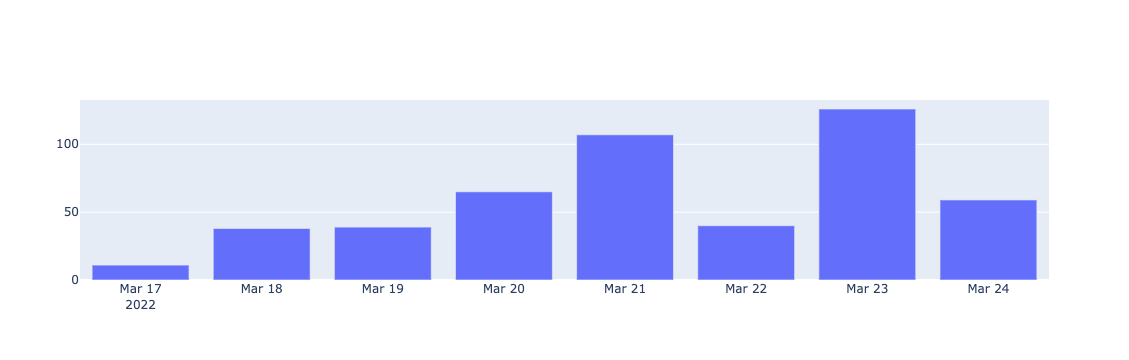

In [93]:
fig = go.Figure(go.Bar(y = timeseries['data.globalProtocolStats.totalProfiles'], x = timeseries['start']))
fig.show()

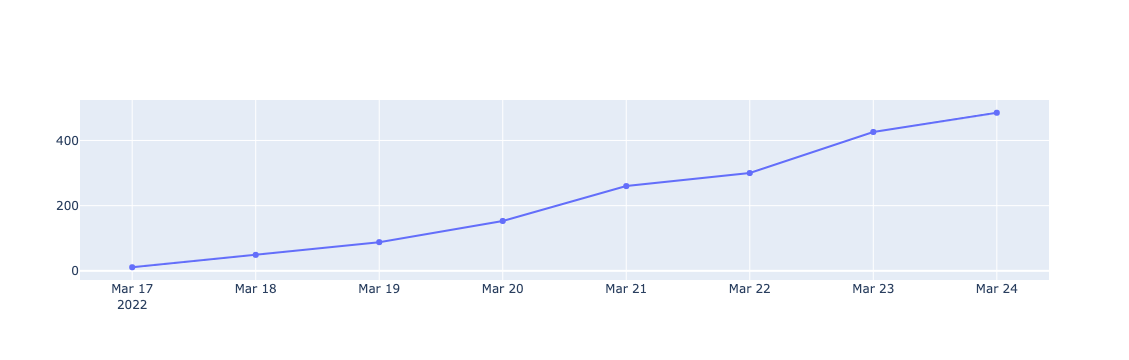

In [94]:
fig = go.Figure(go.Scatter(y = timeseries_cumsum['data.globalProtocolStats.totalProfiles'], x = timeseries_cumsum['start']))
fig.show()

In [34]:
df = f.GraphQLClient.get_publications_by_profile(profile_id='0x3b')

In [ ]:
profile_ids = f.GraphQLClient.get_existing_profile_ids()

In [68]:
profile_revenues = []
for idx,i in enumerate(profile_ids):
    if len(f.GraphQLClient.get_profile_revenues(profile_ids=i, normalize=True)) > 0:
        profile_revenues.append(i)

In [7]:
profile_revenues = ['0x12', '0x13']

In [36]:
f.GraphQLClient.get_profile_revenues(profile_ids=profile_revenues[0])

,protocolFee,publication.id,earnings.asset.name,earnings.asset.symbol,earnings.asset.decimals,earnings.asset.address,earnings.value,profile_id
0,0,0x12-0x05,Wrapped Matic,WMATIC,18,0x9c3C9283D3e44854697Cd22D3Faa240Cfb032889,0.0001,0x12


In [37]:
f.GraphQLClient.get_publication_revenue(publication_id = '0x12-0x05')

,protocolFee,publication.id,earnings.asset.name,earnings.asset.symbol,earnings.asset.decimals,earnings.asset.address,earnings.value
0,0,0x12-0x05,Wrapped Matic,WMATIC,18,0x9c3C9283D3e44854697Cd22D3Faa240Cfb032889,0.0001


In [14]:
df = f.GraphQLClient.get_publications_by_profile(profile_id=profile_revenues[0])

In [19]:
print(df[~df['mirrorOf.mainPost.profile.coverPicture.original.url'].isnull()]['mirrorOf.mainPost.profile.coverPicture.original.url'].values)

['https://ipfs.infura.io/ipfs/QmR7vBHZm78hsymxYFkQBV4UC42Y4iGyHgyFwisMu9S66B']


In [95]:
df = pd.json_normalize(f.GraphQLClient.get_publications(profile_id='0x3b', normalize=True))
df["createdAt"] = pd.to_datetime(df["createdAt"])
counts = df.groupby([pd.Grouper(key="createdAt", freq="D")]).size()

fig = go.Figure([go.Bar(x=df["createdAt"], y=counts)])
fig.update_layout(
    template="simple_white",
    margin=dict(t=35, b=0, l=0, r=0),
)
fig.layout.plot_bgcolor = "#fff"
fig.layout.paper_bgcolor = "#fff"

AttributeError: type object 'GraphQLClient' has no attribute 'get_publications'